# Predictive Analytics and Machine Learning

In [1]:
#load watermark
%load_ext watermark
%watermark -a 'Gopala KR' -u -d -v -p watermark,numpy,pandas,matplotlib,nltk,sklearn,tensorflow,theano,mxnet,chainer,seaborn,keras,tflearn,bokeh,gensim

/srv/venv/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
Using TensorFlow backend.
/srv/venv/lib/python3.6/site-packages/tensorflow/python/util/tf_inspect.py:45: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() or inspect.getfullargspec()
  if d.decorator_argspec is not None), _inspect.getargspec(target))
/srv/venv/lib/python3.6/site-packages/scipy/sparse/sparsetools.py:20: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


Gopala KR 
last updated: 2018-02-20 

CPython 3.6.3
IPython 6.2.1

watermark 1.6.0
numpy 1.14.0
pandas 0.22.0
matplotlib 2.1.2
nltk 3.2.5
sklearn 0.19.1
tensorflow 1.5.0
theano 1.0.1
mxnet 1.1.0
chainer 3.4.0
seaborn 0.8.1
keras 2.1.4
tflearn n
bokeh 0.12.14
gensim 3.3.0


# PreProcessing

In [2]:
import numpy as np
from sklearn import preprocessing
from scipy.stats import anderson

rain = np.load('rain.npy')
rain = .1 * rain
rain[rain < 0] = .05/2
print("Rain mean", rain.mean())
print("Rain variance", rain.var())
print("Anderson rain", anderson(rain))

scaled = preprocessing.scale(rain)
print("Scaled mean", scaled.mean())
print("Scaled variance", scaled.var())
print("Anderson scaled", anderson(scaled))

binarized = preprocessing.binarize(rain.reshape(-1,1))
print(np.unique(binarized), binarized.sum())

lb = preprocessing.LabelBinarizer()
lb.fit(rain.astype(int))
print(lb.classes_)

Rain mean 2.179195942665883
Rain variance 18.803443919014683
Anderson rain AndersonResult(statistic=5731.267850009339, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
Scaled mean 3.4130160280768244e-17
Scaled variance 1.0
Anderson scaled AndersonResult(statistic=5731.267850009339, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))
[0. 1.] 24594.0
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48
 49 50 52 53 55 58 61 62]


# Logistic Regression

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn import datasets
import numpy as np

def classify(x, y):
    clf = LogisticRegression(random_state=12)
    scores = []
    kf = KFold(n_splits=10)
    for train,test in kf.split(x):
      clf.fit(x[train], y[train])
      scores.append(clf.score(x[test], y[test]))

    print("Accuracy: ",np.mean(scores))

rain = np.load('rain.npy')
dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = np.sign(rain[1:])
classify(x.T, y)

#iris example
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
classify(x, y)

Accuracy:  0.5767262564769428
Accuracy:  0.4133333333333333


# Support Vector Machines

In [4]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
import numpy as np
from pprint import PrettyPrinter

def classify(x, y):
    clf = GridSearchCV(SVC(random_state=42, max_iter=100), {'kernel': ['linear', 'poly', 'rbf'], 'C':[1, 10]})
    clf.fit(x, y)
    print("Accuracy: ", clf.score(x, y))
    PrettyPrinter().pprint(clf.cv_results_)

rain = np.load('rain.npy')
dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = np.sign(rain[1:])

classify(x.T, y)

#iris example
iris = datasets.load_iris()
x = iris.data[:, :2]
y = iris.target
classify(x, y)

/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: C

Accuracy:  0.5596606878225765
{'mean_fit_time': array([0.29257345, 0.04513216, 0.36328499, 0.0994219 , 0.04523555,
       0.31286248]),
 'mean_score_time': array([0.04893502, 0.00644183, 0.18805965, 0.03005052, 0.00586812,
       0.16490253]),
 'mean_test_score': array([0.42879043, 0.55570034, 0.36938525, 0.30658184, 0.41673054,
       0.49195156]),
 'mean_train_score': array([0.43378363, 0.55600709, 0.37209364, 0.30101084, 0.41388724,
       0.49604207]),
 'param_C': masked_array(data=[1, 1, 1, 10, 10, 10],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_kernel': masked_array(data=['linear', 'poly', 'rbf', 'linear', 'poly', 'rbf'],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 1, 'kernel': 'linear'},
            {'C': 1, 'kernel': 'poly'},
            {'C': 1, 'kernel': 'rbf'},
            {'C': 10, 'kernel': 'linear'},
           

/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: C

# ElasticNetCV

Score 0.052783876094198205


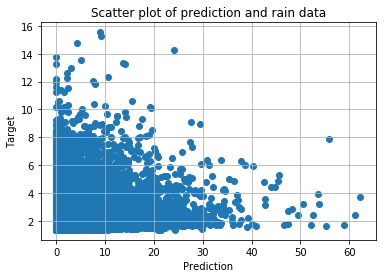

Score 0.6831439034550795


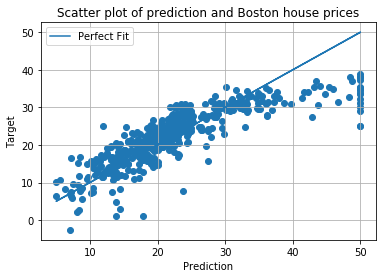

In [5]:
from sklearn.linear_model import ElasticNetCV
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

def regress(x, y, title):
    clf = ElasticNetCV(max_iter=200, cv=10, l1_ratio = [.1, .5, 
.7, .9, .95, .99, 1])

    clf.fit(x, y)
    print("Score", clf.score(x, y))

    pred = clf.predict(x)
    plt.title("Scatter plot of prediction and " + title)
    plt.xlabel("Prediction")
    plt.ylabel("Target")
    plt.scatter(y, pred)
    # Show perfect fit line
    if "Boston" in title:
        plt.plot(y, y, label="Perfect Fit")
        plt.legend()

    plt.grid(True)
    plt.show()

rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = rain[1:]
regress(x.T, y, "rain data")

boston = datasets.load_boston()
x = boston.data
y = boston.target
regress(x, y, "Boston house prices")

# Support Vector Regression

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import learning_curve
from sklearn.svm import SVR
from sklearn import preprocessing
import multiprocessing
import matplotlib.pyplot as plt

def regress(x, y, ncpus, title):
    X = preprocessing.scale(x)
    Y = preprocessing.scale(y)
    clf = SVR(max_iter=ncpus * 200)

    train_sizes, train_scores, test_scores = learning_curve(clf, X, Y, n_jobs=ncpus) 

    plt.figure()
    plt.title(title)
    plt.plot(train_sizes, train_scores.mean(axis=1), label="Train score")
    plt.plot(train_sizes, test_scores.mean(axis=1), '--', label="Test score")
    print("Max test score " + title, test_scores.max())
    plt.grid(True)
    plt.legend(loc='best')
    plt.show()

rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
dates = np.load('doy.npy')

x = np.vstack((dates[:-1], rain[:-1]))
y = rain[1:]
ncpus = multiprocessing.cpu_count()
regress(x.T, y, ncpus, "Rain")

boston = datasets.load_boston()
x = boston.data
y = boston.target
regress(x, y, ncpus, "Boston")

/srv/venv/lib/python3.6/site-packages/sklearn/svm/base.py:218: ConvergenceWarning: Solver terminated early (max_iter=6400).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


# Clustering with affinity propagation

In [ ]:
from sklearn import datasets
from sklearn import cluster
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances

x, _ = datasets.make_blobs(n_samples=100, centers=3, n_features=2, 
random_state=10)
S = euclidean_distances(x)

aff_pro = cluster.AffinityPropagation().fit(S)
labels = aff_pro.labels_

styles = ['o', 'x', '^']

for style, label in zip(styles, np.unique(labels)):
   print(label)
   plt.plot(x[labels == label], style, label=label)
plt.title("Clustering Blobs")
plt.grid(True)
plt.legend(loc='best')
plt.show()

# Mean Shift

In [ ]:
import numpy as np
from sklearn import cluster
import matplotlib.pyplot as plt
import pandas as pd

rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
dates = np.load('doy.npy')
x = np.vstack((dates, rain))
df = pd.DataFrame.from_records(x.T, columns=['dates', 'rain'])
df = df.groupby('dates').mean()
df.plot()
x = np.vstack((np.arange(1, len(df) + 1) , 
df.as_matrix().ravel()))
x = x.T
ms = cluster.MeanShift()
ms.fit(x)
labels = ms.predict(x)

plt.figure()
grays = ['0', '0.5', '0.75']

for gray, label in zip(grays, np.unique(labels)):
    match = labels == label
    x0 = x[:, 0]
    x1 = x[:, 1]
    plt.plot(x0[match], x1[match], lw=label+1, label=label)
    plt.fill_between(x0, x1, where=match, color=gray)

plt.grid(True)
plt.legend()
plt.show()

# Genetic Algorithms

In [ ]:
import array
import random
import numpy as np
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from scipy.stats import shapiro
import matplotlib.pyplot as plt

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", array.array, typecode='d', 
fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, 
creator.Individual, toolbox.attr_float, 200)
toolbox.register("populate", tools.initRepeat, list, 
toolbox.individual)

def eval(individual):
    return shapiro(individual)[1],

toolbox.register("evaluate", eval)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=4)

random.seed(42)

pop = toolbox.populate(n=400)
hof = tools.HallOfFame(1)
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("max", np.max)

algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=80, 
stats=stats, halloffame=hof)

print(shapiro(hof[0])[1])
plt.hist(hof[0])
plt.grid(True)
plt.show()

# Neural Networks

In [ ]:
import numpy as np
import theanets
import multiprocessing
from sklearn import datasets
from sklearn.metrics import accuracy_score

rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
dates = np.load('doy.npy')
x = np.vstack((dates[:-1], np.sign(rain[:-1])))
x = x.T

y = np.vstack(np.sign(rain[1:]),)
N = int(.9 * len(x))

train = [x[:N], y[:N]]
valid = [x[N:], y[N:]]

net = theanets.Regressor(layers=[2,3,1])

net.train(train,valid,learning_rate=0.1,momentum=0.5)

pred = net.predict(x[N:]).ravel()
print("Pred Min", pred.min(), "Max", pred.max())
print("Y Min", y.min(), "Max", y.max())
print("Accuracy", accuracy_score(y[N:], pred >= .5))

# Decision Trees

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
import pydotplus as pydot
import io
import numpy as np
from tempfile import NamedTemporaryFile

rain = .1 * np.load('rain.npy')
rain[rain < 0] = .05/2
dates = np.load('doy.npy').astype(int)
x = np.vstack((dates[:-1], np.sign(rain[:-1])))
x = x.T

y = np.sign(rain[1:])

x_train, x_test, y_train, y_test = train_test_split(x, y, 
random_state=37)

clf = tree.DecisionTreeClassifier(random_state=37)
params = {"max_depth": [2, None],
              "min_samples_leaf": sp_randint(1, 5),
              "criterion": ["gini", "entropy"]}
rscv = RandomizedSearchCV(clf, params)
rscv.fit(x_train,y_train)

sio = io.StringIO()
tree.export_graphviz(rscv.best_estimator_, out_file=sio, 
feature_names=['day-of-year','yest'])
dec_tree = pydot.graph_from_dot_data(sio.getvalue())

with NamedTemporaryFile(prefix='rain', suffix='.png', 
delete=False) as f:
    dec_tree.write_png(f.name)
    print("Written figure to", f.name)

print("Best Train Score", rscv.best_score_)
print("Test Score", rscv.score(x_test, y_test))
print("Best params", rscv.best_params_)